In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
def get_dataset(title, ts_name=None):
    ts_id = None
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()

    return dataset, training_dataset

In [4]:
def rpca_detection_l(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    return robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)

In [5]:
def histogram_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    return histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)

In [6]:
def cluster_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    return cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)

In [7]:
def svm_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    return svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)

In [8]:
def isolation_forest_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    return isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)

In [2]:
# Hum1 Multi - Contamination Level
dataset_names = [
    'Humidity Multi',
    'Humidity Multi CL100',
    'Humidity Multi CL150',
    'Humidity Multi CL200',
    'Humidity Multi CL250'
]
dimension = np.array([50, 100, 150, 200, 250])


In [10]:
# Cont Level - RPCA
# Results array [nmi, rmse, f1]

r_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    scores, y_hat_results, df_common_class, info = rpca_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    r_results.append(result)
    
rpca_results = np.array(r_results)   

In [11]:
# Cont Level - HISTOGRAM
# Results array [nmi, rmse, f1]

h_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    scores, y_hat_results, df_common_class, info = histogram_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    h_results.append(result)
    
histogram_results = np.array(h_results)  

In [12]:
# Cont Level - CLUSTER
# Results array [nmi, rmse, f1]

c_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    scores, y_hat_results, df_common_class, info = cluster_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    c_results.append(result)
    
cluster_results = np.array(c_results)  

In [13]:
# Cont Level - SVM
# Results array [nmi, rmse, f1]

s_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    scores, y_hat_results, df_common_class, info = svm_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    s_results.append(result)
    
svm_results = np.array(s_results)    

In [14]:
# Cont Level - ISOLATION FOREST
# Results array [nmi, rmse, f1]

i_results = []
for dataset_name in dataset_names:
    dataset, training_dataset = get_dataset(dataset_name)
    df = dataset.dataframe
    df_class = dataset.dataframe_class
    scores, y_hat_results, df_common_class, info = isolation_forest_detection_l(df, df_class, training_dataset.dataframe, training_dataset.dataframe_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    i_results.append(result)

isolation_results = np.array(i_results)

In [15]:
scores = [{ 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [16]:
print(scores)

[{'title': 'RPCA', 'scores': array([[0.755, 0.008, 0.887],
       [0.441, 0.038, 0.59 ],
       [0.445, 0.055, 0.613],
       [0.512, 0.06 , 0.7  ],
       [0.427, 0.088, 0.623]])}, {'title': 'Histogram', 'scores': array([[0.001, 0.703, 0.059],
       [0.002, 0.683, 0.131],
       [0.009, 0.656, 0.2  ],
       [0.011, 0.641, 0.254],
       [0.017, 0.618, 0.309]])}, {'title': 'Cluster', 'scores': array([[0.49 , 0.018, 0.697],
       [0.396, 0.041, 0.537],
       [0.404, 0.059, 0.566],
       [0.469, 0.067, 0.655],
       [0.414, 0.091, 0.607]])}, {'title': 'SVM', 'scores': array([[0.082, 0.153, 0.233],
       [0.141, 0.153, 0.382],
       [0.212, 0.148, 0.509],
       [0.284, 0.142, 0.606],
       [0.336, 0.137, 0.671]])}, {'title': 'Isolation Forest', 'scores': array([[0.004, 0.345, 0.088],
       [0.02 , 0.333, 0.188],
       [0.05 , 0.321, 0.295],
       [0.073, 0.312, 0.374],
       [0.092, 0.3  , 0.439]])}]


In [3]:
import numpy as np
scores = [{'title': 'RPCA', 'scores': np.array([[0.755, 0.008, 0.887],
       [0.441, 0.038, 0.59 ],
       [0.445, 0.055, 0.613],
       [0.512, 0.06 , 0.7  ],
       [0.427, 0.088, 0.623]])}, {'title': 'Histogram', 'scores': np.array([[0.001, 0.703, 0.059],
       [0.002, 0.683, 0.131],
       [0.009, 0.656, 0.2  ],
       [0.011, 0.641, 0.254],
       [0.017, 0.618, 0.309]])}, {'title': 'Cluster', 'scores': np.array([[0.49 , 0.018, 0.697],
       [0.396, 0.041, 0.537],
       [0.404, 0.059, 0.566],
       [0.469, 0.067, 0.655],
       [0.414, 0.091, 0.607]])}, {'title': 'SVM', 'scores': np.array([[0.082, 0.153, 0.233],
       [0.141, 0.153, 0.382],
       [0.212, 0.148, 0.509],
       [0.284, 0.142, 0.606],
       [0.336, 0.137, 0.671]])}, {'title': 'Isolation Forest', 'scores': np.array([[0.004, 0.345, 0.088],
       [0.02 , 0.333, 0.188],
       [0.05 , 0.321, 0.295],
       [0.073, 0.312, 0.374],
       [0.092, 0.3  , 0.439]])}]

In [4]:
def generate_nmi_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,0], label=title)
    ax.set_ylabel('Score (NMI)')
    ax.set_xlabel('Number of Outliers')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

In [5]:
def generate_rmse_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,1], label=title)
        #ax.plot(dimension, scores[:, 1], label='$RMSE$')
        #ax.plot(dimension, scores[:, 2], label='$F_1-Score$')
    ax.set_ylabel('Score (RMSE)')
    ax.set_xlabel('Number of Outliers')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

In [6]:
def generate_f1_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,2], label=title)
    ax.set_ylabel('Score (F1)')
    ax.set_xlabel('Number of Outliers')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

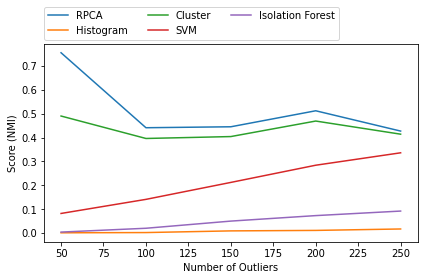

In [7]:
generate_nmi_line_chart(dimension, scores)

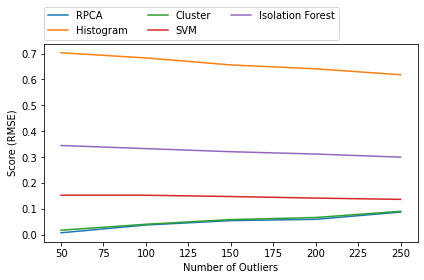

In [8]:
generate_rmse_line_chart(dimension, scores)

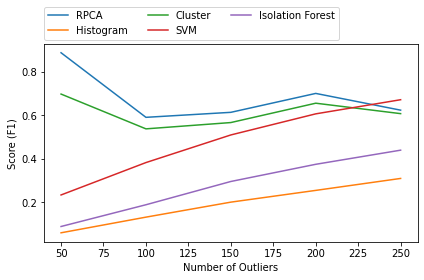

In [9]:
generate_f1_line_chart(dimension, scores)